# Imports

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data Preprocessing

In [75]:
# Get the data
q1 = pd.read_csv('statements/q12024.csv')
q2 = pd.read_csv('statements/q22024.csv')

df = pd.concat([q1, q2])
df = df.sort_values(by='Date')

## Need to consolidate & rename categories

In [101]:
df.loc[:, 'Category'] = df['Category'].astype('object')

# Renaming
df.loc[df['Category'] == 'Rental Car & Taxi', 'Category'] = 'Uber'

# Consolidating
df.loc[df['Category'] == 'Amusement', 'Category'] = 'Entertainment'
df.loc[df['Category'] == 'Business Services', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Books', 'Category'] = 'Hobbies'
df.loc[df['Category'] == 'Cash', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Clothing', 'Category'] = 'Shopping'
df.loc[df['Category'] == 'Coffee Shops', 'Category'] = 'Fast Food'
df.loc[df['Category'] == 'Credit Card Payment', 'Category'] = 'Bills & Utilities'
df.loc[df['Category'] == 'Utilities', 'Category'] = 'Bills & Utilities'
df.loc[df['Category'] == 'Service & Parts', 'Category'] = 'Auto & Transport'
df.loc[df['Category'] == 'Fees & Charges', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Pet Food & Supplies', 'Category'] = 'Pets'
df.loc[df['Category'] == 'Financial', 'Category'] = 'Bills & Utilities'
df.loc[df['Category'] == 'Sporting Goods', 'Category'] = 'Shopping'
df.loc[df['Category'] == 'Television', 'Category'] = 'Subscriptions'
df.loc[df['Category'] == 'Movies & Dvds', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Music', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Doctor', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Electronics & Software', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Auto & Transport', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Food & Dining', 'Category'] = 'Food'
df.loc[df['Category'] == 'Restaurants', 'Category'] = 'Food'
df.loc[df['Category'] == 'Fast Food', 'Category'] = 'Food'
df.loc[df['Category'] == 'Mortgage & Rent', 'Category'] = 'Bills & Utilities'
df.loc[df['Category'] == 'Home Services', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Hotel', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == 'Paycheck', 'Category'] = ''
df.loc[df['Category'] == 'Interest Income', 'Category'] = 'Income'
df.loc[df['Category'] == 'Home', 'Category'] = 'Uncategorized'
df.loc[df['Category'] == '', 'Category'] = 'Uncategorized'

unique = pd.DataFrame(df.Category.unique(), columns=['Category']).sort_values(by='Category')
unique

,Category
24,Alcohol & Bars
7,Bills & Utilities
22,Car
20,Charity
14,Education
1,Entertainment
2,Food
3,Gas
0,Groceries
5,Grooming


In [78]:
# Print any category to see what is in there
cat_df = df[df['Category'] == '']
cat_df

,Date,Description,Original Description,Category,Amount,Status


### Renaming 'Uncategorized' Category

In [79]:
# 'Uncategorized'
uncategorized_df = df[df['Category'] == 'Uncategorized']
uncategorized_df

,Date,Description,Original Description,Category,Amount,Status
420,2024-01-03,Vee?s Chop Shop,SQ *VEE?S CHOP SHOP SAN ANTONIO TX,Uncategorized,-52.80,Posted
413,2024-01-05,Alannah at Westo Web,Alannah at Westo WEB PMTS ***********6S0C,Uncategorized,-516.58,Posted
392,2024-01-09,U-Haul,U-HAULRAPID STICKER SPRING TX,Uncategorized,-57.32,Posted
398,2024-01-09,Southwest Resear Payroll,SOUTHWEST RESEAR PAYROLL ***********7500,Uncategorized,398.96,Posted
379,2024-01-11,Tattoos by Megan Fox San Antonio Tx,SQ *TATTOOS BY MEGAN FOX SAN ANTONIO TX,Uncategorized,-720.00,Posted
...,...,...,...,...,...,...
10,2024-06-26,Internet Withdrawal,INTERNET WITHDRAWAL,Uncategorized,-275.00,Posted
9,2024-06-26,Internet Withdrawal,INTERNET WITHDRAWAL,Uncategorized,-461.00,Posted
6,2024-06-27,Flix Brewhouse,FLIX BREWHOUSE SAN ANTONIO TX,Uncategorized,-32.68,Posted
7,2024-06-27,Nintendo,Nintendo CD1228419392 800-2553700 WA,Uncategorized,-8.65,Posted


In [102]:
df.loc[df['Description'] == 'Alannah at Westo Web', 'Category'] = 'Bills & Utilities'
df.loc[df['Description'] == 'Internet Withdrawal', 'Category'] = 'Transfer'
df.loc[df['Description'] == 'Vee?s Chop Shop', 'Category'] = 'Grooming'
df.loc[df['Description'] == 'Tattoos by Megan Fox San Antonio Tx', 'Category'] = 'Shopping'
df.loc[df['Description'] == 'Canva', 'Category'] = 'Education'
df.loc[df['Description'] == 'Seat Engine', 'Category'] = 'Entertainment'
df.loc[df['Description'] == 'Scratchpay.com', 'Category'] = 'Veterinary'
df.loc[df['Description'] == 'Google Drive', 'Category'] = 'Subscriptions'
df.loc[df['Description'].str.contains('auravia', case=False, na=False), 'Category'] = 'Medical'
df.loc[df['Description'] == 'Nintendo', 'Category'] = 'Shopping'
df.loc[df['Description'] == 'Crunchyroll', 'Category'] = 'Subscriptions'
df.loc[df['Description'] == 'Wok Inn Pkwy', 'Category'] = 'Food'
df.loc[df['Description'].str.contains('sherwood', case=False, na=False), 'Category'] = 'Pets'
df.loc[df['Description'].str.contains('car wash', case=False, na=False), 'Category'] = 'Car'
df.loc[df['Description'].str.contains('flix', case=False, na=False), 'Category'] = 'Entertainment'
df.loc[df['Description'] == 'Apple', 'Category'] = 'Subscription'
df.loc[df['Description'] == 'Spotify', 'Category'] = 'Subscription'
df.loc[df['Description'] == 'Concept Pca', 'Category'] = 'Shopping'
df.loc[df['Description'] == 'Pi Shop Inc', 'Category'] = 'Hobbies'
df.loc[df['Description'] == 'U-Haul', 'Category'] = 'Moving Costs'
df.loc[df['Description'] == 'W Loop', 'Category'] = 'Shopping'
df.loc[df['Description'] == 'Southwest Resear Payroll', 'Category'] = 'Income'

uncategorized_df = df[df['Category'] == 'Uncategorized']
uncategorized_df

,Date,Description,Original Description,Category,Amount,Status
67,2024-03-13,Culebra,10555 CULEBRA RD. SAN ANTONIO TX,Uncategorized,-100.0,Posted


In [83]:
# Double check final categories
unique = pd.DataFrame(df.Category.unique(), columns=['Category']).sort_values(by='Category')
unique

,Category
24,Alcohol & Bars
7,Bills & Utilities
22,Car
20,Charity
14,Education
1,Entertainment
2,Food
3,Gas
0,Groceries
5,Grooming


In [8]:
# Drop Columns if necessary
# df.drop(columns = ['Original Description'], inplace=True)
# df.drop(columns = ['Status'], inplace=True)

In [63]:
# Sort months into their own DataFrames for analysis
df['Month'] = df['Date'].apply(lambda x: x[5:7])

january  = df[df['Month'] == '01']
february = df[df['Month'] == '02']
march    = df[df['Month'] == '03']
april    = df[df['Month'] == '04']
may      = df[df['Month'] == '05']
june     = df[df['Month'] == '06']
july     = df[df['Month'] == '07']

# Monthly Analysis

## Monthly Analysis Subroutines

In [103]:
def get_income(month_df):
    credits = month_df[month_df.Amount > 0]
    income = credits.Amount.sum()

    return income

def get_expenses(month_df):
    debits = month_df[month_df.Amount < 0]
    expenses = debits.Amount.sum()

    return expenses

def get_grocery_spending(month_df):
    spending = month_df[month_df['Category'] == 'Groceries']

    return spending

def get_visualization_df(month_df, groceries):
    if (groceries == 1):
        filtered_df = month_df[(month_df['Amount'] < 0) & (month_df['Category'] != 'Transfer')]
    else:
        filtered_df = month_df[(month_df['Amount'] < 0) & (month_df['Category'] != 'Transfer') & (df['Category'] != 'Groceries')]

    filtered_df.loc[:, 'Amount'] = filtered_df['Amount'].abs()
    spending_by_category = filtered_df.groupby('Category')['Amount'].sum()

    return spending_by_category

def show_pie_chart(spending_df):
    plt.figure(figsize=(6, 6))

    # Create a color map with a number of colors
    num_categories = len(spending_df)
    colors = plt.get_cmap('viridis')(range(num_categories))  # Get colors from the colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(spending_df)))

    np.random.seed(42)  # For reproducibility
    colors = np.random.rand(num_categories, 3) 

    # Map category names to colors
    category_colors = {cat: colors[i] for i, cat in enumerate(spending_df.index)}
    
    plt.pie(spending_df, labels=spending_df.index, colors=[category_colors[cat] for cat in spending_df.index], startangle=250)
    plt.axis('equal')
    plt.title('Spending Distribution by Category')
    plt.show()

def print_stats(income_df, expense_df, grocery_df, month):
    print("\n")
    print("{} Pay: ${:.2f}".format(month, income_df))
    print("{} Expense: ${:.2f}".format(month, expense_df))
    print("{} Net: ${:.2f}".format(month, income_df + expense_df))
    print("Grocery Spending in {}: ${:.2f}".format(month, grocery_df['Amount'].sum()))
    print("\n\n")
    return

## January Summary



January Pay: $6957.94
January Expense: $-7034.30
January Net: $-76.36
Grocery Spending in January: $-1253.04





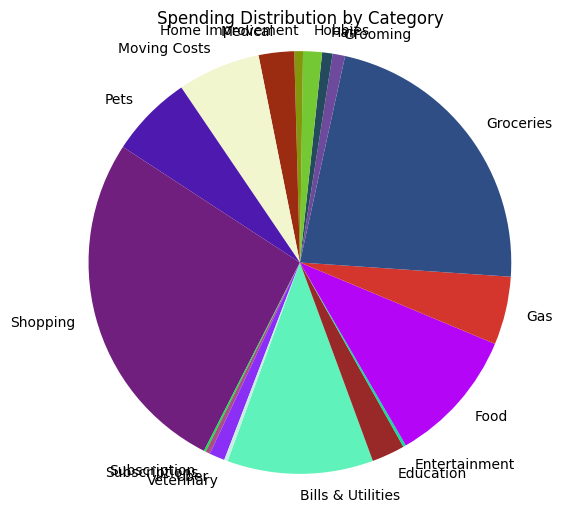

In [104]:
jan_income = get_income(january)
jan_expense = get_expenses(january)
jan_grocery = get_grocery_spending(january)

print_stats(jan_income, jan_expense, jan_grocery, "January")
      
spending_by_category = get_visualization_df(january, 1)
show_pie_chart(spending_by_category)

## February Summary



February Pay: $3274.40
February Expense: $-5503.17
February Net: $-2228.77
Grocery Spending in February: $-1224.47





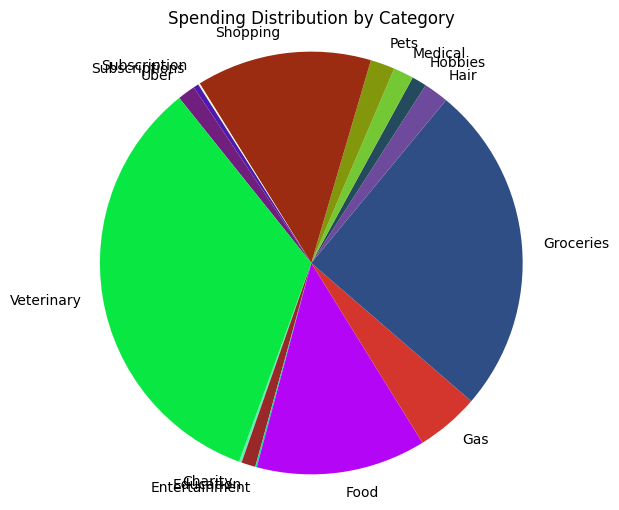

In [105]:
feb_income = get_income(february)
feb_expense = get_expenses(february)
feb_grocery = get_grocery_spending(february)

print_stats(feb_income, feb_expense, feb_grocery, "February")
      
spending_by_category = get_visualization_df(february, 1)
show_pie_chart(spending_by_category)

## March Summary



February Pay: $3274.40
February Expense: $-5503.17
February Net: $-2228.77
Grocery Spending in February: $-1224.47





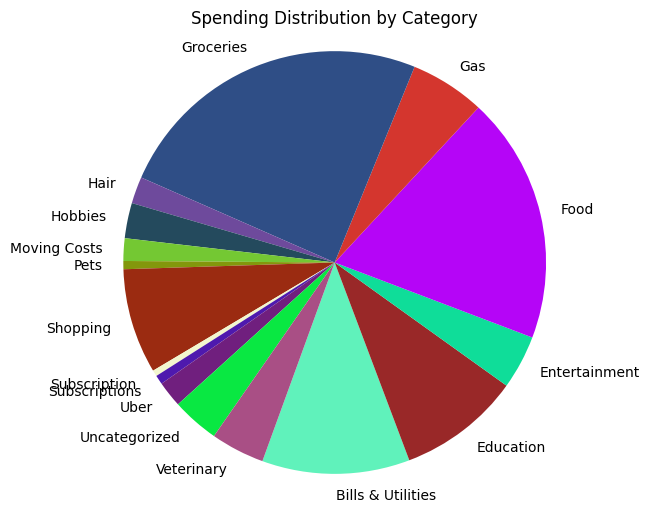

In [106]:
mar_income = get_income(march)
mar_expense = get_expenses(march)
mar_grocery = get_grocery_spending(march)

print_stats(feb_income, feb_expense, feb_grocery, "February")
      
spending_by_category = get_visualization_df(march, 1)
show_pie_chart(spending_by_category)

## April Summary



March Pay: $3526.99
March Expense: $-3161.83
March Net: $365.16
Grocery Spending in March: $-678.93





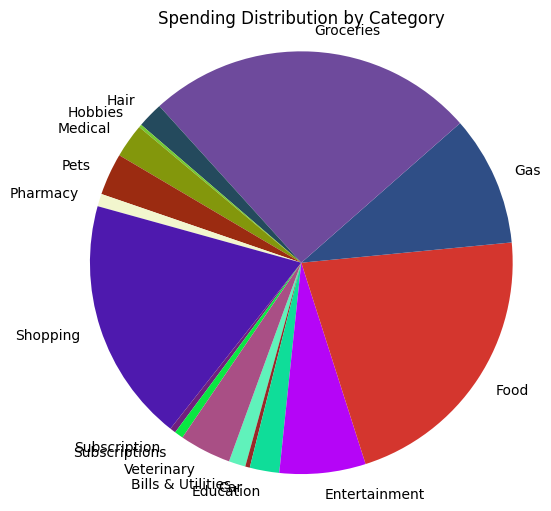

In [107]:
apr_income = get_income(april)
apr_expense = get_expenses(april)
apr_grocery = get_grocery_spending(april)

print_stats(mar_income, mar_expense, mar_grocery, "March")
      
spending_by_category = get_visualization_df(april, 1)
show_pie_chart(spending_by_category)

## May Summary



May Pay: $9494.60
May Expense: $-3732.75
May Net: $5761.85
Grocery Spending in May: $-450.08





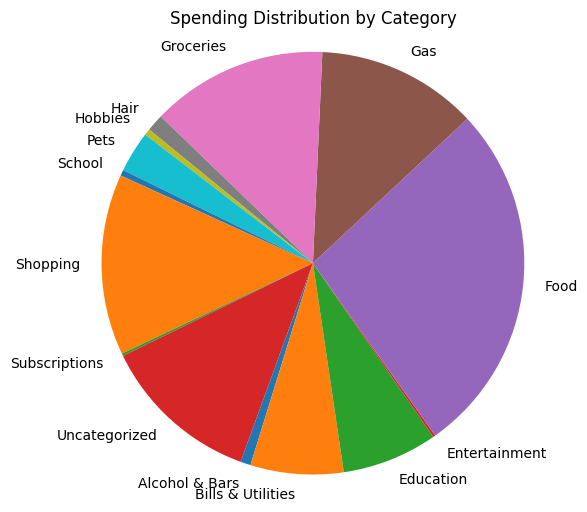

In [15]:
may_income = get_income(may)
may_expense = get_expenses(may)
may_grocery = get_grocery_spending(may)

print_stats(may_income, may_expense, may_grocery, "May")
      
spending_by_category = get_visualization_df(may, 1)
show_pie_chart(spending_by_category)

## June Summary



June Pay: $7434.91
June Expense: $-14318.30
June Net: $-6883.39
Grocery Spending in June: $-1028.12





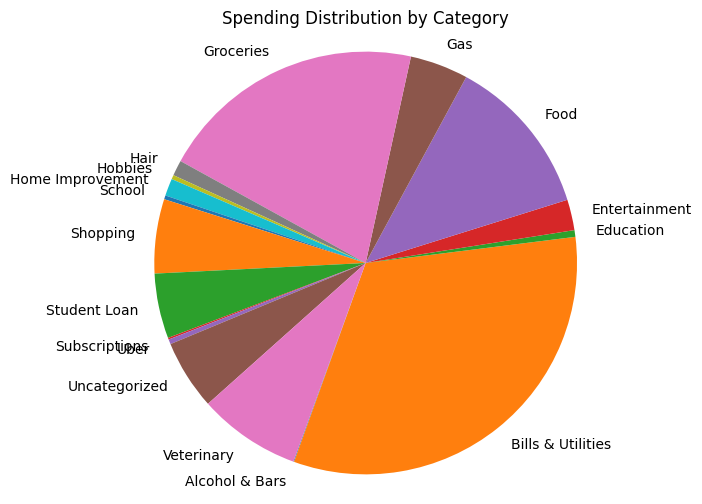

In [16]:
jun_income = get_income(june)
jun_expense = get_expenses(june)
jun_grocery = get_grocery_spending(june)

print_stats(jun_income, jun_expense, jun_grocery, "June")
      
spending_by_category = get_visualization_df(june, 1)
show_pie_chart(spending_by_category)

# Visualizations

## Pay YTD

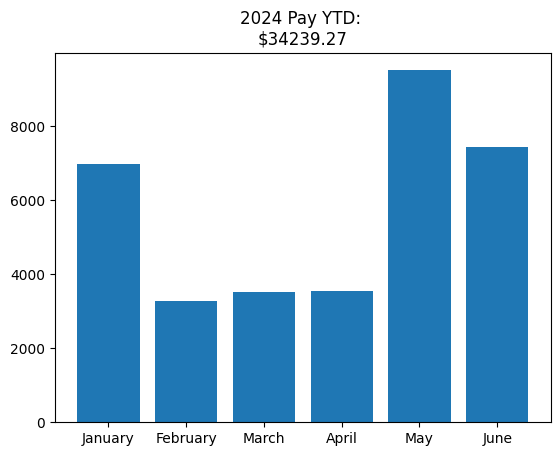

In [17]:
total_pay = {'January':jan_income,'February':feb_income,'March':mar_income,'April':apr_income,'May':may_income,'June':jun_income}
plt.bar(total_pay.keys(), total_pay.values())
plt.title('2024 Pay YTD: \n${:.2f}'.format(sum(list(total_pay.values()))))
plt.show()
plt.close()

## Spending by Category

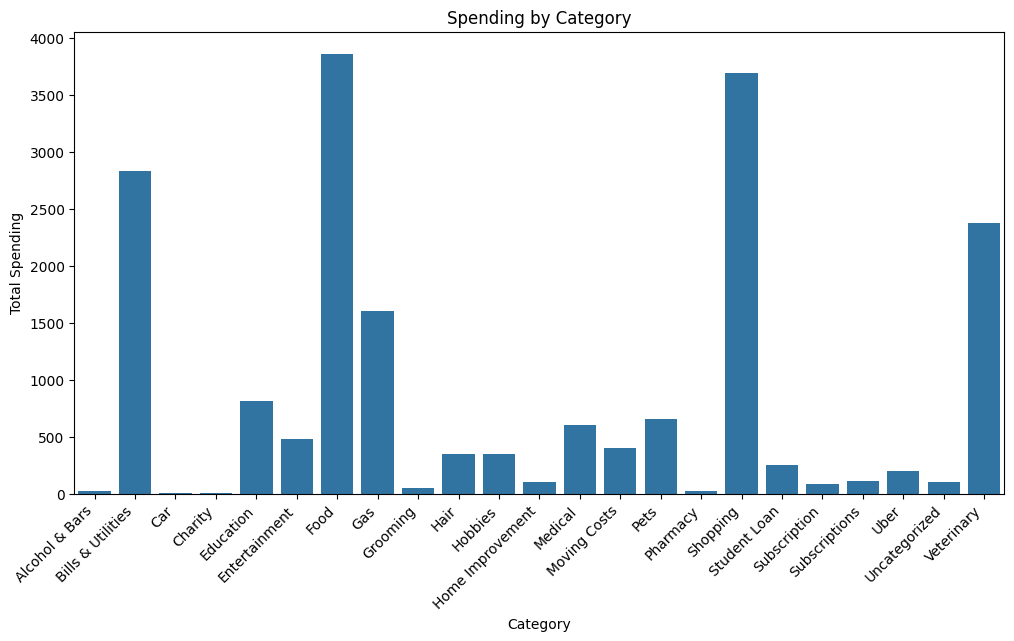

In [108]:
filtered_df = df[(df['Amount'] < 0) & (df['Category'] != 'Transfer') & (df['Category'] != 'Groceries')]
filtered_df.loc[:, 'Amount'] = filtered_df['Amount'].abs()
spending_by_category = filtered_df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=spending_by_category.index, y=spending_by_category.values)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Spending by Category')
plt.show()

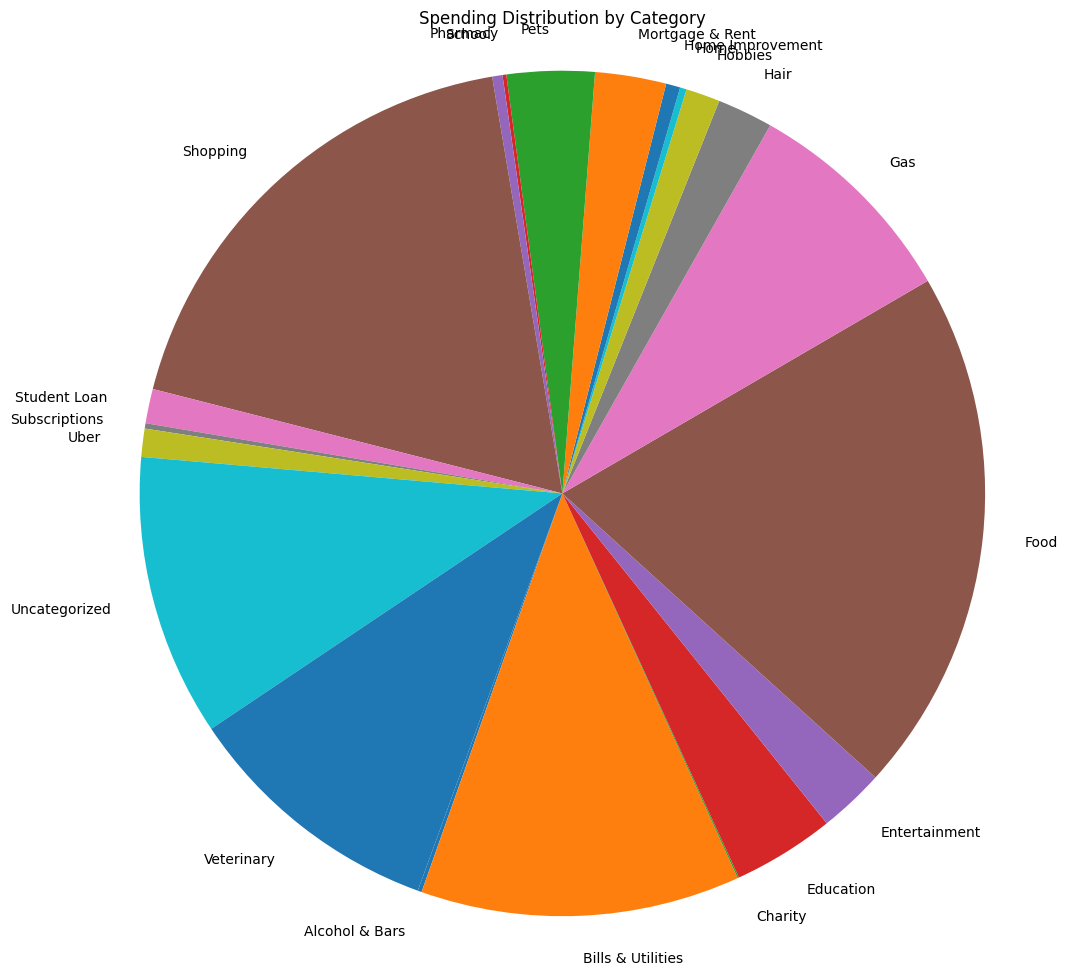

In [19]:
plt.figure(figsize=(12 ,12))
plt.pie(spending_by_category, labels=spending_by_category.index, startangle=250)
plt.axis('equal')
plt.title('Spending Distribution by Category')
plt.show()